In [1]:
from pitch import Pitch

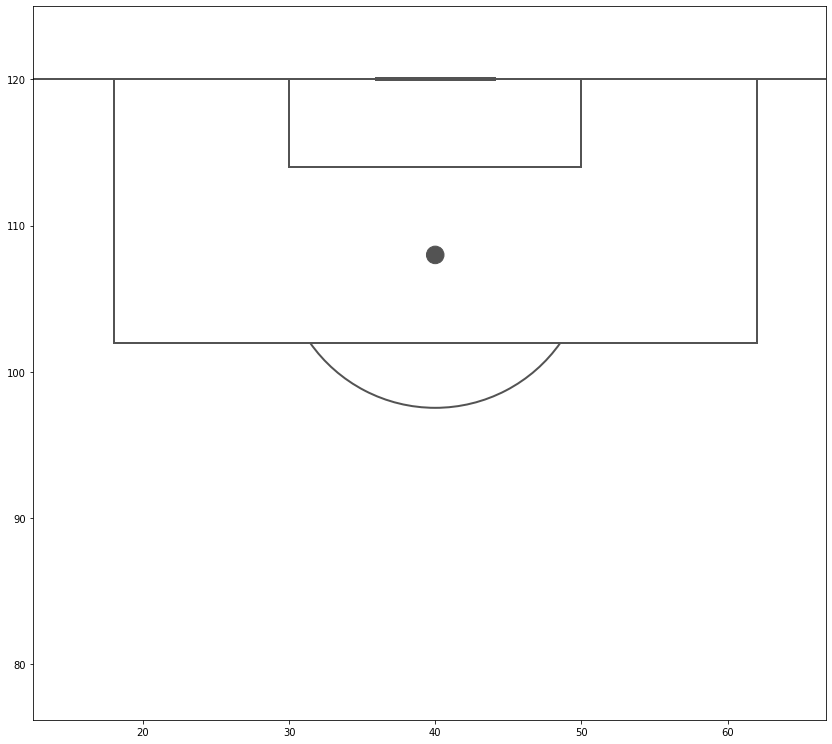

In [2]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='half',layout=(1,1),pitch_color='white',
              line_color='#535353',figsize=(14.2,14.2),goal_type='line',axis='on',xpad=(-12.5,-13.3),ypad=(-16.2,5))
ax = pitch.draw()

# Opta

#### Opta vertical full

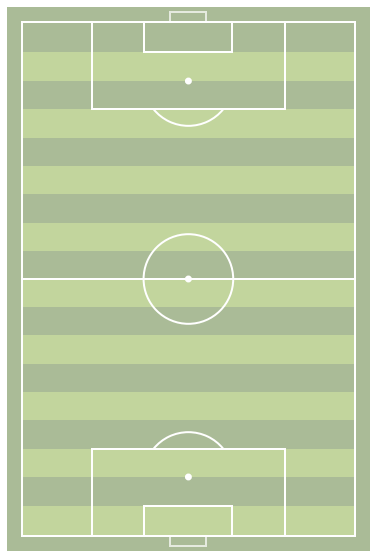

In [3]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),stripe=True,
                      goal_type='box')
ax = pitch.draw()
#ax[0].plot([39.56,39.56],[0,100])

#### Opta horizontal full

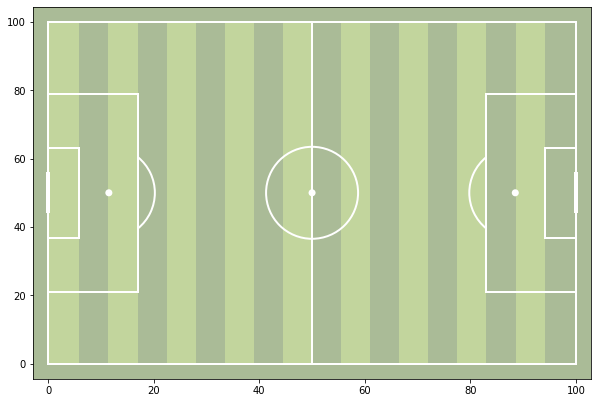

In [4]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### Opta vertical half

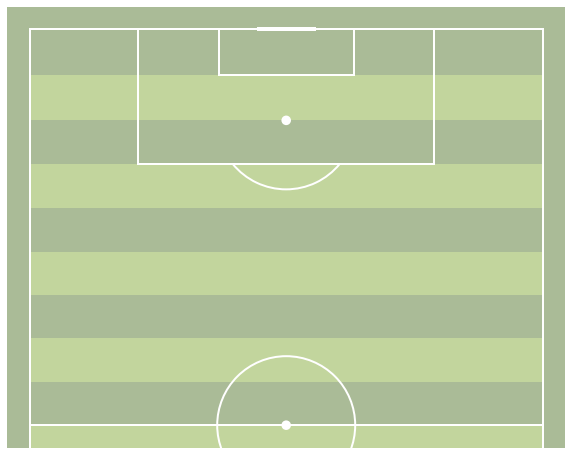

In [5]:
pitch = Pitch(pitch_type='opta',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()

#### Opta Horizontal half

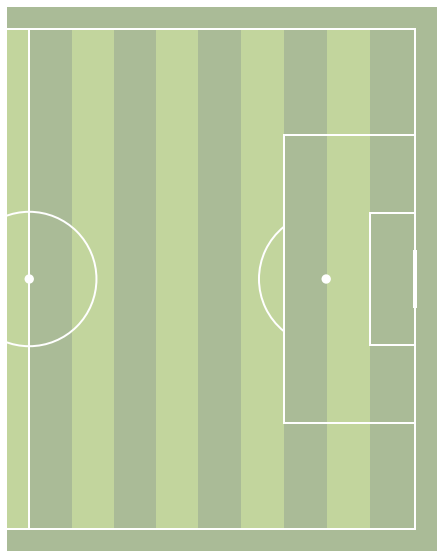

In [6]:
pitch = Pitch(pitch_type='opta',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()

# Statsbomb

#### Statsbomb vertical full

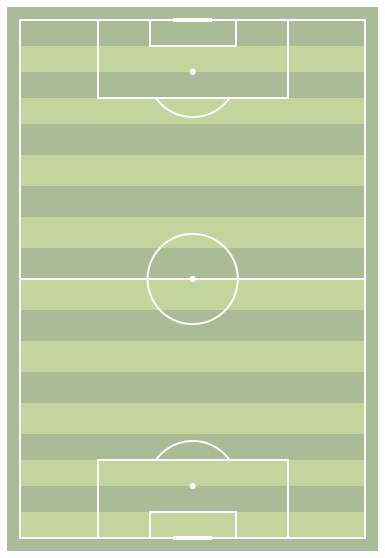

In [7]:
pitch = Pitch(pitch_type='statsbomb',orientation='vertical',view='full',figsize=(10,10),stripe=True,goal_type='line')
ax = pitch.draw()

## Statsbomb horizontal full

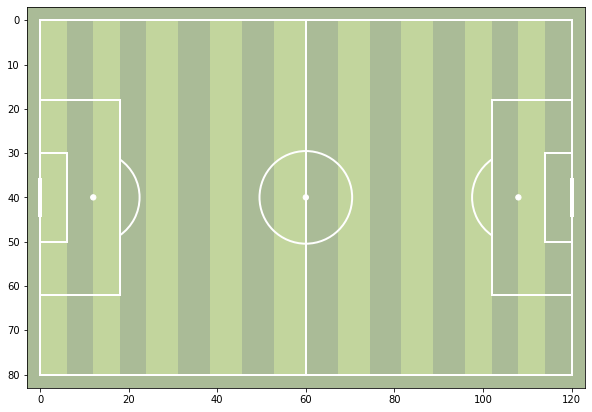

In [8]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### Statsbomb vertical half

#### Statsbomb Horizontal half

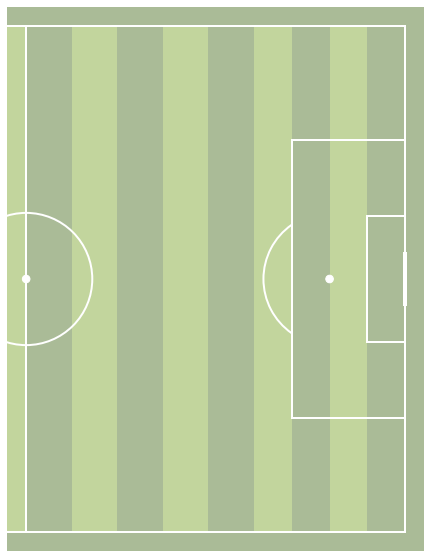

In [9]:
pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,
                     goal_type='line')
ax = pitch.draw()

# Tracab

#### Tracab vertical full

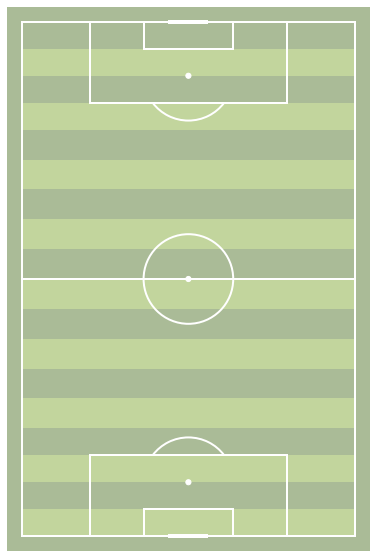

In [10]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()

#### Tracab horizontal full

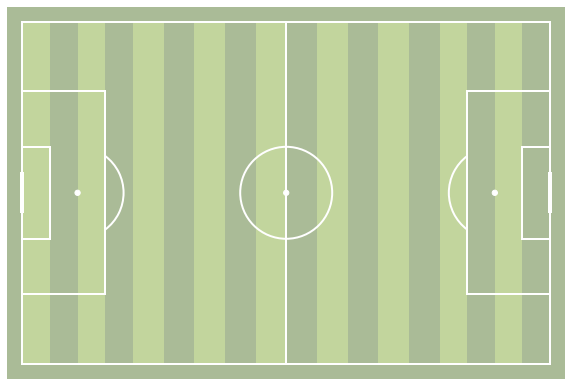

In [11]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()

#### Tracab vertical half

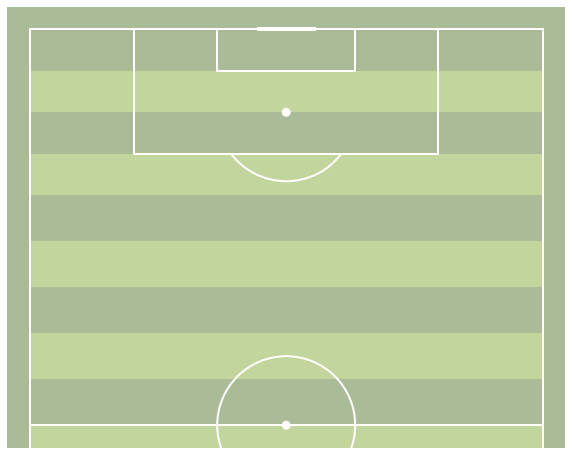

In [12]:
pitch = Pitch(pitch_type='tracab',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()

#### Tracab Horizontal half

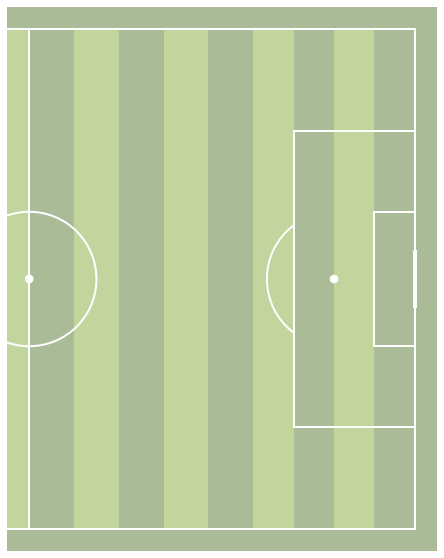

In [13]:
pitch = Pitch(pitch_type='tracab',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),
                  pitch_width=68,pitch_length=105,stripe=True,goal_type='line')
ax = pitch.draw()

# Stats.com

#### stats.com vertical full

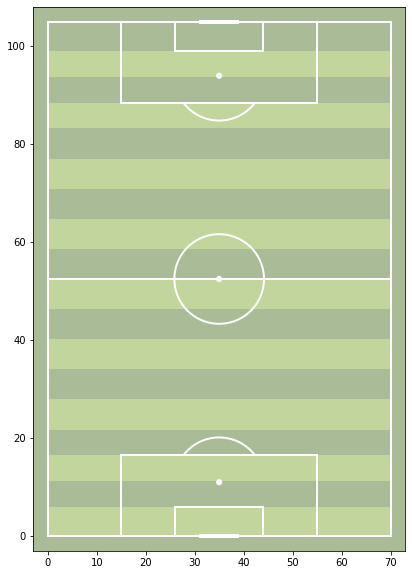

In [14]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### stats.com horizontal full

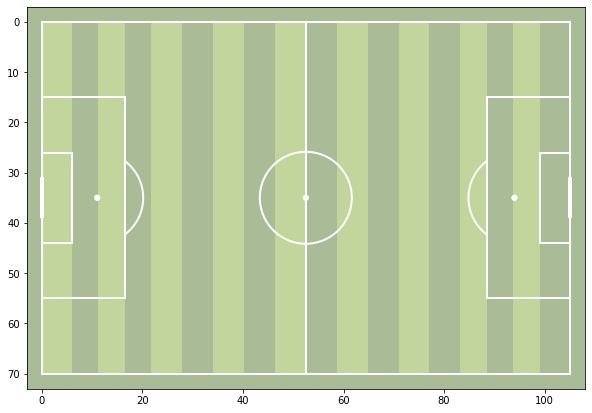

In [15]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### stats.com vertical half

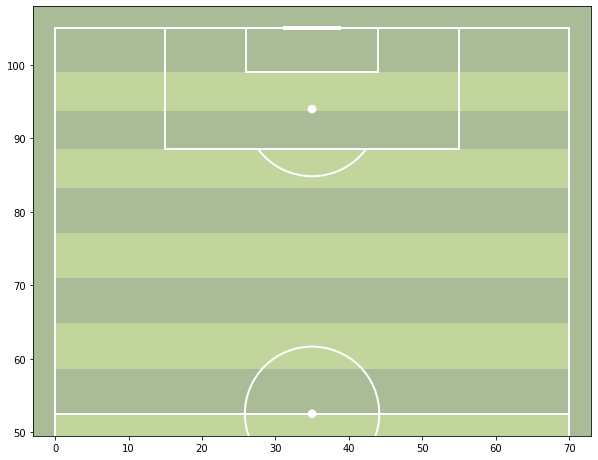

In [16]:
pitch = Pitch(pitch_type='stats',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### stats.com Horizontal half

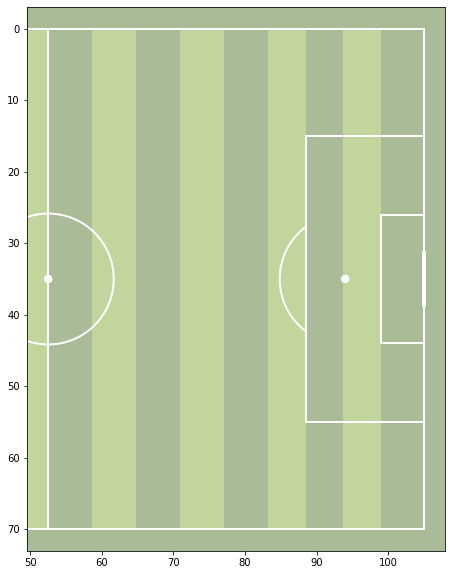

In [17]:
pitch = Pitch(pitch_type='stats',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

# Wyscout

#### wyscout vertical full

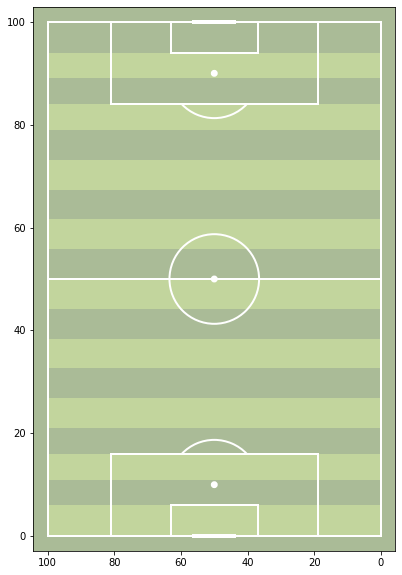

In [18]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='full',figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### wyscout horizontal full

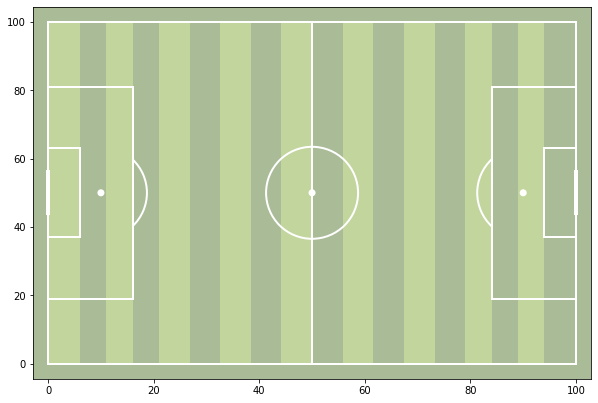

In [19]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='full',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### wyscout vertical half

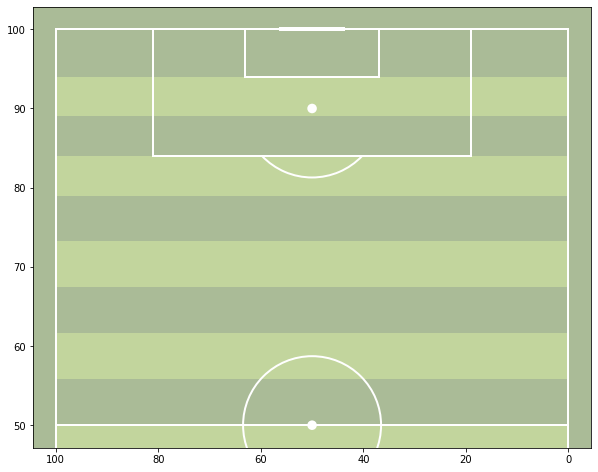

In [20]:
pitch = Pitch(pitch_type='wyscout',orientation='vertical',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis='on',
                     goal_type='line')
ax = pitch.draw()

#### wyscout Horizontal half

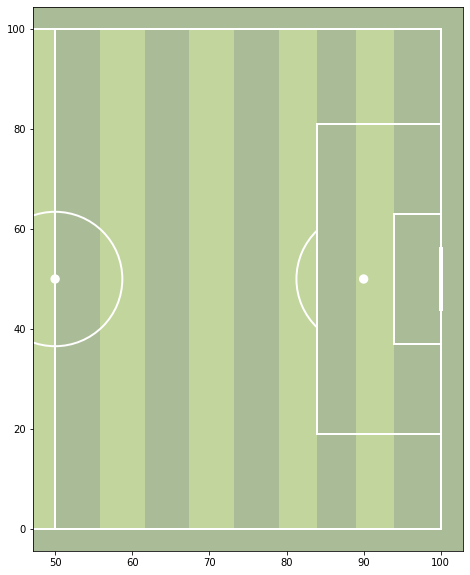

In [21]:
pitch = Pitch(pitch_type='wyscout',orientation='horizontal',view='half',layout=(1,1),figsize=(10,10),stripe=True,axis='on',goal_type='line')
ax = pitch.draw()